# Disrupting Demography: A study of Population Studies

## A scientometric review in honour of the journal's 75th birthday

Last updated: 2021-01-18

By Melinda C. Mills and Charles Rahal

### 1. Preamble

Lets first load in some functions we've created for analysis:

In [1]:
import os
import pandas as pd
from popstudies_preprocessor import build_datasets, load_curated
from popstudies_analysis import (make_word_vis, make_author_table,
                                 make_affil_plot, describe_lengths,
                                 summarize_scrape_and_curate,
                                 gender_over_time, headline_topics,
                                 make_mwc, make_mf_topics,
                                 plot_G, plot_G0_and_G1,
                                 make_network, authorship_per_paper,
                                 authorship_country, network_summary,
                                 continental_analysis, keyword_tabulation)
%load_ext autoreload
%autoreload 2

And then define a couple of key I\O paths and load in some of key datasets\representations.

In [2]:
d_path = os.path.abspath(os.path.join('..', 'data'))
figure_path = os.path.abspath(os.path.join('..', 'article',
                                           'figures'))
main_df, ref_df, auth_df = build_datasets(d_path)
G, Gcc, authors_df, author_papers = make_network(auth_df)

### 2. Basic summary statistics

Lets look at some basic descriptives of our cache of papers and authors:

In [3]:
summarize_scrape_and_curate(main_df, auth_df, ref_df, G, Gcc, d_path)

Total number of papers in our main database: 1901
Total number of papers in our author database: 1900
Papers with no abstract: 182
In our main dataframe there are 1858 Articles.
In our main dataframe there are 5 Editorials.
In our main dataframe there are 19 Erratums.
In our main dataframe there are 2 Letters.
In our main dataframe there are 6 Notes.
In our main dataframe there are 11 Reviews.
Total number of authorships: 3445
Total number of unique authors: 2027
Average number of references per paper: 24.76801683324566
Average number of authors per paper: 1.813
The most number of refrences in one paper: 311 (DOI: 10.1080/00324720600646410)
Date of first article: 1947-01-01
Date of most recent article: 2020-09-01
Average paper length (pages): 15.44390243902439
Number of OpenAccess articles: 52
The average number of citations is: 22.354550236717518
The maximum number of citations is: 732(10.1080/713779060)
Number of papers with no citations: 189
Percent of inter-affiliation collaboratio

### 3. Visualisations and more indepth analysis

#### 3.1 Describe the lengths of the articles over time:

All-time: mean length was 14.44, stdev was 6.96, max length of 67.0
Glass and Grebenik: mean length was 13.94, stdev was 8.49, max length of 67.0
Grebenik: mean length was 15.4, stdev was 6.35, max length of 43.0
Simmons: mean length was 14.05, stdev was 4.36, max length of 34.0
Ermisch: mean length was 15.59, stdev was 3.38, max length of 22.0


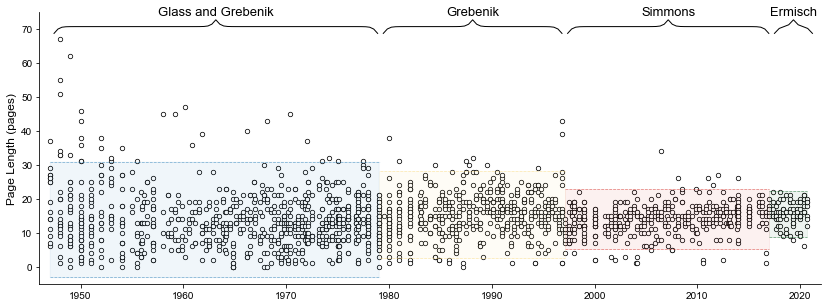

In [4]:
describe_lengths(main_df)

#### 3.2 Word Frequencies:

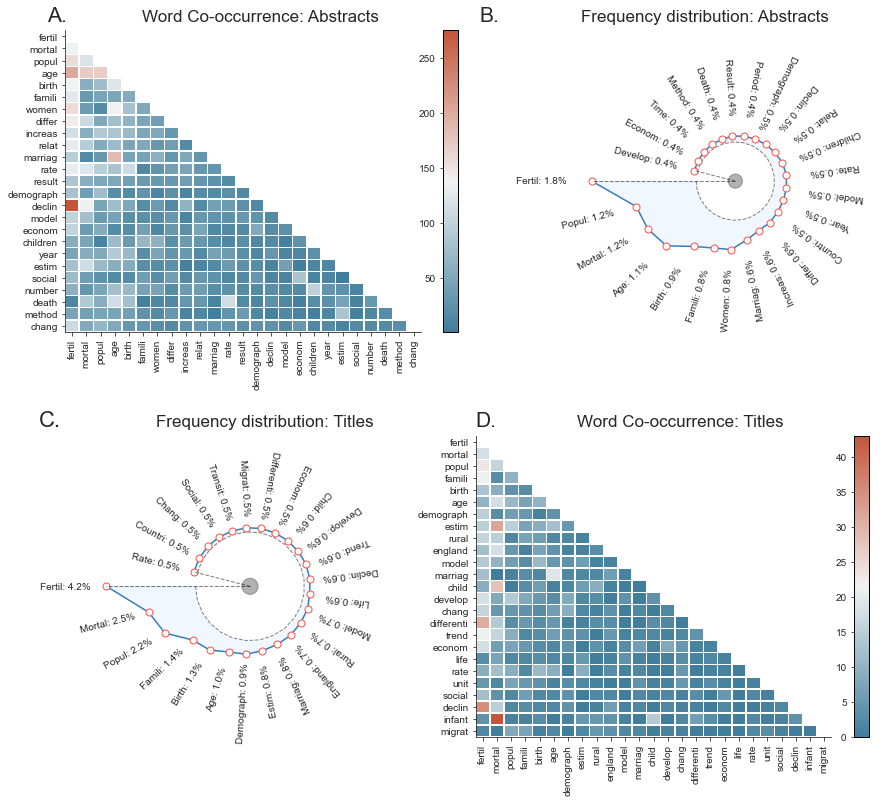

In [5]:
make_word_vis(main_df, figure_path, d_path)

And now something for keywords:

In [6]:
keyword_tabulation(main_df)

We have keywords for 398 papers
We have a total of 2591 keywords

The top 10 keywords are:
keyword
fertility                83
mortality                46
education                25
china                    23
marriage                 23
historical demography    22
migration                19
infant mortality         18
life expectancy          17
ageing                   16
Name: keyword, dtype: int64


#### 3.3 Authorship

In [7]:
authorship_per_paper(auth_df)

Average number of authors per paper in the 1940s: 1.161
Average number of authors per paper in the 1950s: 1.149
Average number of authors per paper in the 1960s: 1.298
Average number of authors per paper in the 1970s: 1.501
Average number of authors per paper in the 1980s: 1.76
Average number of authors per paper in the 1990s: 1.678
Average number of authors per paper in the 2000s: 2.356
Average number of authors per paper in the 2010s: 2.815
The most number of authors on one paper: 26 (DOI: 10.1080/00324728.2019.1595099)
The number of solo authored papers: 1083
The number of papers with 2 authors is : 441
The number of papers with 3 authors is : 213
The number of papers with more than 3 authors is : 163
Percent of solo authored papers in the 1940s: 0.839
Percent of solo authored papers in the 1950s: 0.876
Percent of solo authored papers in the 1960s: 0.796
Percent of solo authored papers in the 1970s: 0.688
Percent of solo authored papers in the 1980s: 0.498
Percent of solo authored p

Who are the most prolific\influential authors in our dataset?

In [8]:
make_author_table(auth_df, main_df, d_path, 'Papers')

                  Papers  Cites  H-Index First  Last
fullname                                            
Robert G. Potter      21    296        9  1956  1986
John C. Caldwell      20   1351       13  1963  2004
John E. Knodel        15    620       11  1967  2000
D. V. Glass           15     78        5  1950  1971
Mikko Myrskylä        15     99        6  2014  2020


In [9]:
make_author_table(auth_df, main_df, d_path, 'Cites')

                   Papers  Cites  H-Index First  Last
fullname                                             
John C. Caldwell       20   1351       13  1963  2004
Samuel H. Preston      14   1204       11  1974  2016
Larry L. Bumpass        5    801        4  1982  2000
Hsien Hen Lu            1    732        1  2000  2000
John G.F. Cleland       7    686        6  1987  2003


In [10]:
make_author_table(auth_df, main_df, d_path, 'H-Index')

                    Papers  Cites  H-Index First  Last
fullname                                              
John C. Caldwell        20   1351       13  1963  2004
Michael J. Murphy       12    383       11  1985  2016
John E. Knodel          15    620       11  1967  2000
Samuel H. Preston       14   1204       11  1974  2016
Ronald F. Freedman      13    258       10  1954  1990


What do we know about the authors as a whole?

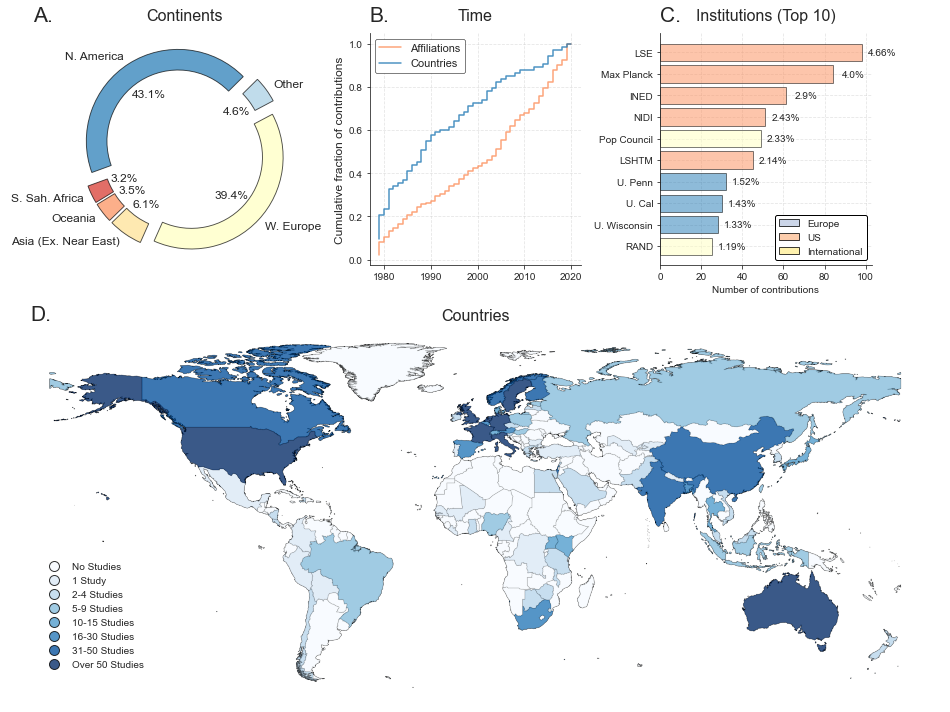

In [11]:
make_affil_plot(main_df, auth_df, d_path, figure_path)

In [12]:
authorship_country(auth_df, d_path)

Number of unique countries from which authors write from: 73

These are: United States (935), United Kingdom (343), Netherlands (115), Germany (86), Australia (76), Sweden (60), France (55), Italy (53), Canada (41), Finland (40), Israel (38), China (36), India (33), Norway (31), Austria (28), Spain (24), Belgium (22), Bangladesh (18), South Africa (17), Switzerland (15), Uganda (14), Denmark (13), Kenya (11), Thailand (11), Japan (10), Brazil (8), Estonia (8), Indonesia (7), Hungary (7), Nigeria (7), Poland (6), Singapore (6), Taiwan (5), Russian Federation (5), New Zealand (4), Zimbabwe (4), Czech Republic (4), Greece (4), Lebanon (3), Viet Nam (3), Malaysia (3), Tanzania (3), Chile (3), Swaziland (3), Slovenia (3), Ghana (3), Saudi Arabia (2), Botswana (2), Costa Rica (2), South Korea (2), Egypt (2), Latvia (2), Malawi (2), Pakistan (2), Haiti (2), Nicaragua (2), Ireland (2), Gambia (1), Cameroon (1), Uzbekistan (1), Bolivia (1), Mali (1), Bulgaria (1), Turkey (1), Colombia (1), Mexi

#### 3.4 Authorship gender

Lets look at authorship gender over time:

Percent of female authorships (full sample): 34.11%


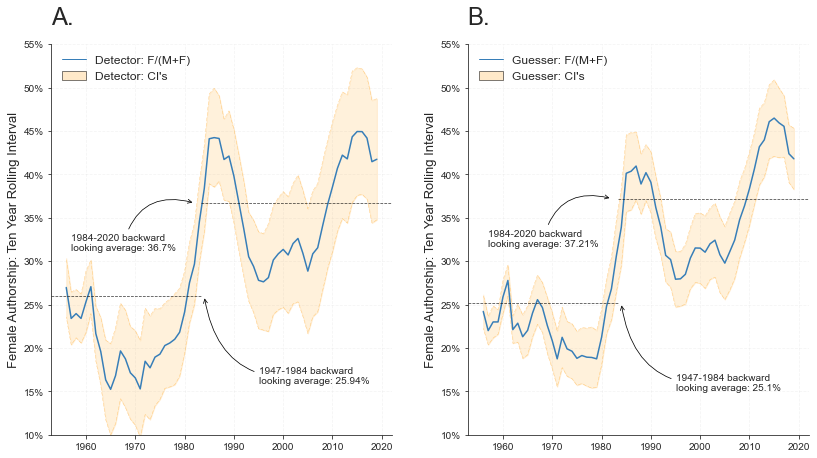

In [13]:
gender_over_time(auth_df[auth_df['forename']!='NAN'])

#### 3.5 Topics Studied

Lets now look at the topics studied, first over time:

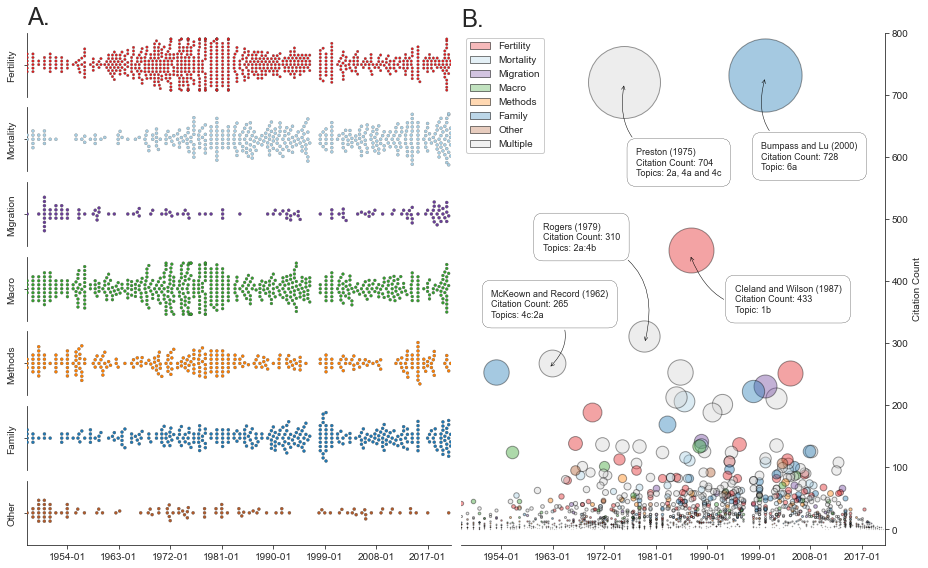

In [14]:
headline_topics(main_df)

and now decompose it into what apers focus on men, women or children:

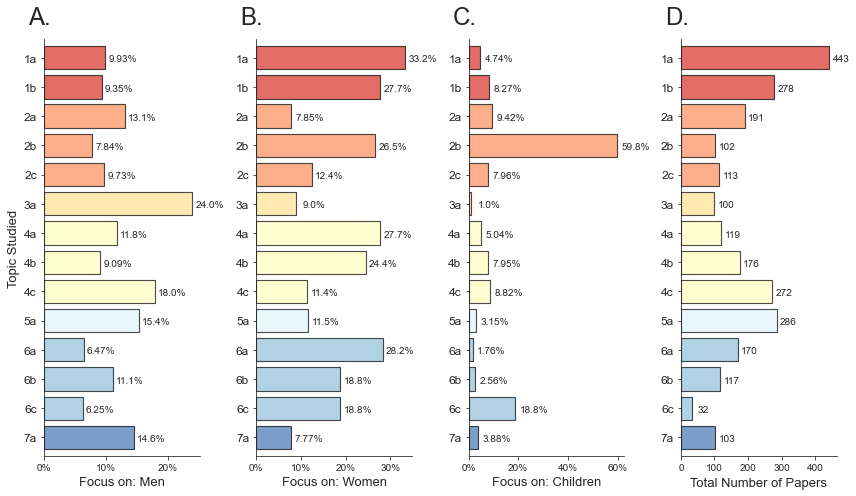

In [15]:
make_mwc(main_df)

What about authorship across topics?

In [16]:
make_mf_topics(auth_df[auth_df['forename']!='NAN'], main_df, d_path)

   Topic_M Subtopics_M Topic_F Subtopics_F Topic_Ratio Subtopics_Ratio
1a     564         319     275         192        2.05            1.66
1b                 245                  83                        2.95
2a     396         189     230          79        1.72            2.39
2b                  78                  52                         1.5
2c                 129                  99                         1.3
3a     104          83      62          51        1.68            1.63
3b                   6                   4                         1.5
3c                  15                   7                        2.14
4a     421          95     208          59        2.02            1.61
4b                 148                  88                        1.68
4c                 178                  61                        2.92
5a     237         237      68          68        3.49            3.49
6a     244         127     201          86        1.21            1.48
6b    

#### 3.6 Populations Studied

What nations are the being being studied coming from?

In [17]:
main_df.groupby(['Nation'])['Nation'].count().sort_values(ascending=False)[:10]

Nation
United States     108
China              79
England; Wales     61
India              60
United Kingdom     54
England            43
Sweden             35
Bangladesh         31
Australia          24
Finland            22
Name: Nation, dtype: int64

Lets break this down into continents with some manual merging

In [18]:
print('We have continent data for: ' + \
      str(round(len(main_df[main_df['Continent'].notnull()]) /
                len(main_df)*100, 2)) + '% of papers.')
print(main_df.groupby(['Continent'])['Continent'].count())

We have continent data for: 70.54% of papers.
Continent
Africa           164
Asia             358
Europe           468
Multiple         100
North America    158
Oceana            33
South America     60
Name: Continent, dtype: int64


And finally lets crosstab this with Topics, and normalize (divide by sum) for column sums:

In [19]:
continental_analysis(main_df, figure_path)

           Europe    Africa North America      Asia South America  Multiple    Oceana
Topic 1  0.229805  0.343220      0.351464  0.334630      0.360825  0.221429  0.215686
Topic 2  0.174095  0.177966      0.096234  0.163424      0.144330  0.185714  0.176471
Topic 3  0.048747  0.038136      0.071130  0.044747      0.092784  0.114286  0.117647
Topic 4  0.292479  0.194915      0.255230  0.229572      0.226804  0.214286  0.196078
Topic 5  0.064067  0.072034      0.092050  0.056420      0.072165  0.114286  0.058824
Topic 6  0.161560  0.131356      0.108787  0.143969      0.082474  0.107143  0.196078
Topic 7  0.029248  0.042373      0.025105  0.027237      0.020619  0.042857  0.039216


#### 3.5 Network Stuff

Lets look at the entire network, coloured by the number of nodes in the subcomponent (not included in the main paper, perhaps?):

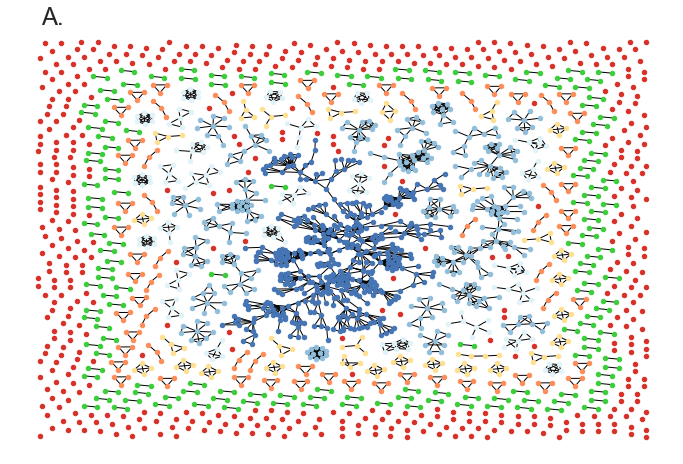

In [20]:
plot_G(G, figure_path)

Lets isolate the Giant and 'Second Giant' (?) components and visualise them:

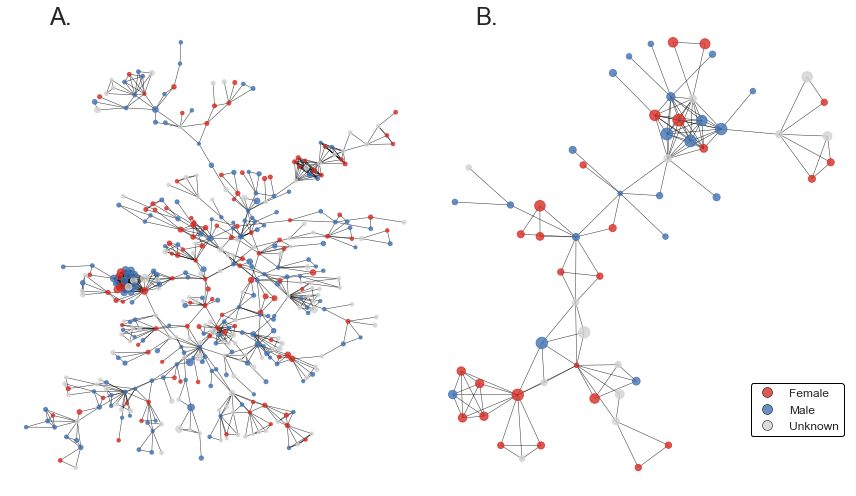

In [21]:
plot_G0_and_G1(G, authors_df, author_papers, figure_path)

Finally, print out some summary statistics from our network:

In [22]:
network_summary(G, Gcc)

Edges in entire network: 2317
Nodes in entire network: 2026
Density of entire network: 0.0011295138508037488
Edges in Giant Component: 926
Nodes in Giant Component: 433
Density of Giant Component: 0.009900778376528955
